# Exploration of `ExPeCoN`

Running analyses and simulations of `ExPeCoN`

___

    Author:  Carina Forster et al.
    Contact: forster@cbs.mpg.de
    Years:   2023

___

## Setup 

In [1]:
# Import my expecon_ms package and other modules
from pathlib import Path

import numpy as np
from expecon_ms.configs import config, params, path_to


***********************************************************************************************
***********************************************************************************************

										expecon_ms

***********************************************************************************************
***********************************************************************************************

Current working dir:	e:\expecon_ms\code\notebooks
New working dir: 'E:\expecon_ms'



In [2]:
# Set global vars & paths

# this doesn't work for some reason
# the variables set here are not recognized in the functions

# raw concatenated eeg data
save_dir_concatenated_raw1 = Path(path_to.data.eeg.RAW_expecon1)
save_dir_concatenated_raw2 = Path(path_to.data.eeg.RAW_expecon2)
save_dir_concatenated_raw1.mkdir(parents=True, exist_ok=True)
save_dir_concatenated_raw2.mkdir(parents=True, exist_ok=True)

# stimulus locked
save_dir_stim_1 = Path(path_to.data.eeg.preprocessed.stimulus_expecon1)
save_dir_stim_2 = Path(path_to.data.eeg.preprocessed.stimulus_expecon2)
save_dir_stim_1.mkdir(parents=True, exist_ok=True)
save_dir_stim_2.mkdir(parents=True, exist_ok=True)

# cue locked
save_dir_cue_1 = Path(path_to.data.eeg.preprocessed.cue_expecon1)
save_dir_cue_2 = Path(path_to.data.eeg.preprocessed.cue_expecon2)
save_dir_cue_1.mkdir(parents=True, exist_ok=True)
save_dir_cue_2.mkdir(parents=True, exist_ok=True)

# directory that contains the cleaned epochs
dir_clean_epochs_expecon1 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon1)
dir_clean_epochs_expecon2 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon2)

# EEG cap layout file
filename_montage = Path(path_to.data.templates)
filename_montage.mkdir(parents=True, exist_ok=True)

# raw behavioral data
behav_path = Path(path_to.data.behavior)
behav_path.mkdir(parents=True, exist_ok=True)

# participant IDs
id_list_expecon1 = config.participants.ID_list_expecon1
id_list_expecon2 = config.participants.ID_list_expecon2

# pilot data counter (for expecon 1, participant ID starts with ID007)
pilot_counter = config.participants.pilot_counter

# data_cleaning parameters defined in config.toml
rt_max = config.behavioral_cleaning.rt_max
rt_min = config.behavioral_cleaning.rt_min
hitrate_max = config.behavioral_cleaning.hitrate_max
hitrate_min = config.behavioral_cleaning.hitrate_min
farate_max = config.behavioral_cleaning.farate_max
hit_fa_diff = config.behavioral_cleaning.hit_fa_diff

## Analyse 

1. Preprocessing

In [ ]:
# Import functions from expecon_package for data analysis
from expecon_ms.eeg.preprocessing import prepro as pp
from expecon_ms.eeg.preprocessing import ica

In [9]:
# function expects a raw object with .fif file ending
pp.prepro(study=1, trigger='stimulus', l_freq=1, h_freq=40, tmin=-1,
        tmax=1, resample_rate=250,
        sf=2500, detrend=1, ransac=1, autoreject=0)

# how many channels were interpolated?
pp.n_channels_interpolated(study=1, trigger='stimulus', l_freq=0.1)

# run ica on clean, epoched data
ica.run_ica(study=1, infomax=1, save_psd=1)
# correlate with EOG and ECG and mark bad componets for rejection

ica.label_ica_correlation(study=1)

# usa icalabel to mark components for rejection
#ica.label_iclabel(study=1)

007 already exists
008 already exists
009 already exists
010 already exists
011 already exists
012 already exists
013 already exists
014 already exists
015 already exists
016 already exists
017 already exists
018 already exists
019 already exists
020 already exists
021 already exists
022 already exists
023 already exists
024 already exists
025 already exists
026 already exists
027 already exists
028 already exists
029 already exists
030 already exists
031 already exists
032 already exists
033 already exists
034 already exists
035 already exists
036 already exists
037 already exists
038 already exists
039 already exists
040 already exists
041 already exists
042 already exists
043 already exists
044 already exists
045 already exists
046 already exists
047 already exists
048 already exists
049 already exists
Done with preprocessing and creating clean epochs
mean channels interpolated 0.9767441860465116
std of channels interpolated: 1.2628081348257383
min channels interpolated: 0
max chann

[3,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 5,
 3,
 4,
 4,
 2,
 5,
 3,
 5,
 5,
 4,
 3,
 2,
 4,
 4,
 4,
 2,
 4,
 1,
 6,
 3,
 2,
 2,
 4,
 5,
 7,
 6,
 3,
 2,
 2,
 2,
 1,
 5,
 6,
 4]

ICA stats

In [20]:
import pandas as pd

# how many components did we reject?
df = pd.read_csv("E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\ica_components_stats_icacorr.csv")

# mean components rejected
print(f' on average {df["0"].mean()} components were rejected')
print(f' the sdt of components rejected is {df["0"].std()}')
print(f' the maximum of components rejected is {df["0"].max()}')
print(f' the minimum of components rejected is {df["0"].min()}')

 on average 3.488372093023256 components were rejected
 the sdt of components rejected is 1.4204642605124334
 the maximum of components rejected is 7
 the minimum of components rejected is 1


2. Evoked potentials

In [2]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.sensor import evokeds as evo

Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\sensor\evokeds.py : Mon Dec 18 14:45:56 2023 +1000


In [3]:
# compare evokeds and plot contrasts
evokeds = evo.create_contrast(study=1, drop_bads=True, laplace=False,
                              subtract_evoked=False, save_data_to_disk=False,
                              save_drop_log=False)

Participant 0
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P007_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.43
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['FT9', 'F6']
1 bad epochs dropped
Dropped 0 epochs: 
Dropped 48 epochs: 1, 2, 13, 14, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 55, 57, 58, 59, 60, 62, 73, 83, 84, 85, 100, 119, 120, 122, 123, 124, 125, 127, 129
NOTE: pick_channels() is a le

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

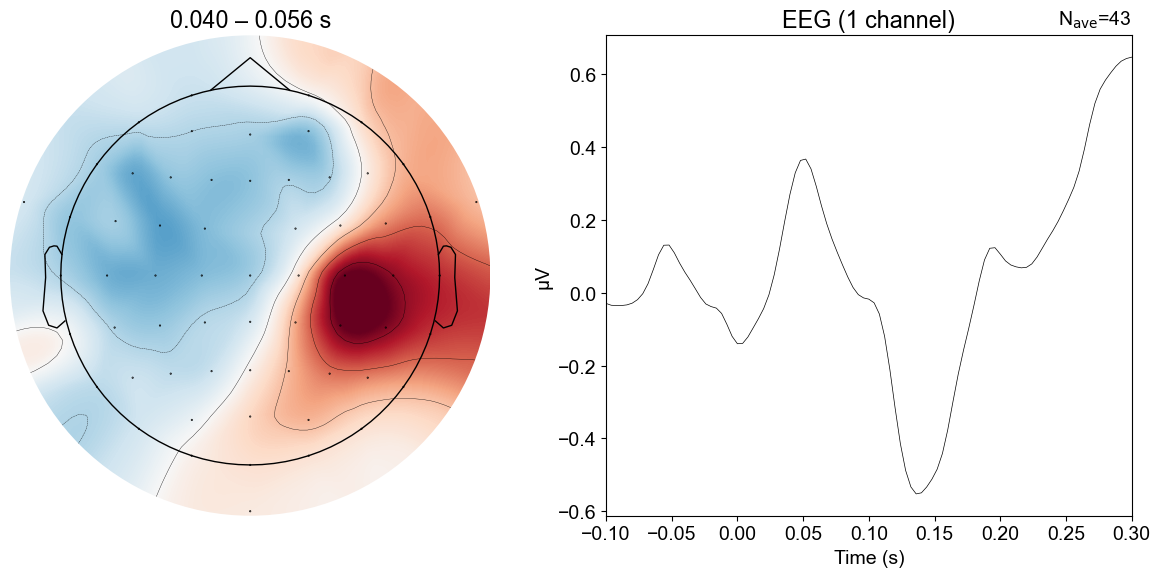

In [4]:
# plot evoked contrast and topography for the contrast
evo.plot_roi(study=1, data=evokeds, tmin=-0.1, tmax=0.3, tmin_base=-0.1, tmax_base=0)

3. Time-frequency analysis

In [2]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.sensor import tfr_contrasts as tfr

Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\sensor\tfr_contrasts.py : Tue Dec 19 13:58:32 2023 +1000


In [5]:
# compute tfr representations for each condition
tfr.compute_tfr(study=1, cond='prev_resp', tmin=-0.4, tmax=0, fmax=35,
 fmin=3, laplace=False, induced=False, mirror=True, drop_bads=True)

Analyzing 007
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P007_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.43
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['FT9', 'F6']
1 bad epochs dropped
Not setting metadata
718 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 0 epochs: 
Dropped 28 epochs: 1, 2, 4, 5, 6, 7, 8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 29, 30, 31, 32, 33,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.6s finished


TFR already exists
Analyzing 008
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P008_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  7
Mean hit rate: 0.70
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'Fz', 'F7', 'FC5', 'T7', 'O2', 'P8', 'Cz', 'FT10', 'FC2', 'Fp2', 'AF7', 'AFz', 'F5', 'C1', 'PO7',

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.4s finished


TFR already exists
Analyzing 009
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P009_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  2
Mean hit rate: 0.46
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F7', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['AF8']
2 bad epochs dropped
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 0 epochs: 
Dropped 1 epoch: 67


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.1s finished


TFR already exists
Analyzing 010
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P010_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
715 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
570 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 23 epochs: 0, 9, 10, 11, 12, 14, 15, 17, 18, 19, 21, 22, 23, 24, 41, 42, 53, 54, 55, 56, 57, 58, 64
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished


TFR already exists
Analyzing 011
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P011_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  2
Mean hit rate: 0.53
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EE

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.9s finished


TFR already exists
Analyzing 012
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P012_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
714 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  11
Mean hit rate: 0.53
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['FT8']
    Rejecting  epoch based on EEG : ['Fp2']
3 bad epochs dropped
Not setting metadata
561 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 31 columns
Dropped 48 epochs: 48, 4

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.2s finished


TFR already exists
Analyzing 013
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P013_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.47
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  1
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'C3', 'T7', 'AF7', 'F5', 'FT7', 'FC3', 'C5', 'TP7', 'CP3', 'F6']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'C3', 'T7', 'F5', 'FT7', 'FC3', 'TP7', 'F6']
2 bad epochs dropped
Not setting metadata
571 matching events found
No baseline correction app

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.6s finished


TFR already exists
Analyzing 014
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P014_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  5
Mean hit rate: 0.74
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['Fp2', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['A

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.5s finished


TFR already exists
Analyzing 015
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P015_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.60
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 59 epochs: 0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 30, 38, 39, 43, 44, 45, 46, 50, 69, 71, 72, 73, 74, 75, 77, 79, 91, 92

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.6s finished


TFR already exists
Analyzing 016
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P016_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
716 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  2
Mean hit rate: 0.50
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
0 bad epochs dropped
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 31 columns
Dropped 2 epochs: 117, 118
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.2s finished


TFR already exists
Analyzing 017
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P017_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Fp1', 'FT9', 'F4', 'Fp2', 'AF7', 'AF3', 'FC3', 'C5', 'FC4']
    Rejecting  epoch based on EEG : ['Fp1', 'FT9', 'AF7']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on E

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.3s finished


TFR already exists
Analyzing 018
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P018_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
717 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.72
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['P7', 'T8', 'FT10', 'F8', 'Fp2', 'AF7', 'TP7', 'FT8', 'AF8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
3 bad epochs dropped
Not setting metadata
569 matching events found
No baseline correction applied
0 projection items activated
Addin

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.7s finished


TFR already exists
Analyzing 019
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P019_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.51
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['P7', 'P5', 'PO7']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'P7', 'O1', 'P5', 'PO7', 'PO3']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['AF4']
   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.9s finished


TFR already exists
Analyzing 020
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P020_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
716 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  5
Mean hit rate: 0.47
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['FT9', 'FC5', 'T8', 'F8', 'FT8']
    Rejecting  epoch based on EEG : ['FT9', 'FC3']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['O1', 'Fp2', 'PO3']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
6 bad epo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.9s finished


TFR already exists
Analyzing 021
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P021_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.54
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 12 epochs: 0, 1, 2, 3, 4, 5, 81, 82, 89, 90, 91, 134
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.1s finished


TFR already exists
Analyzing 022
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P022_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
717 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.42
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
5 bad epochs dropped
Not setting metadata
711 matching events found
No baseline correction applie

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.2s finished


TFR already exists
Analyzing 023
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P023_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  2
Mean hit rate: 0.55
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
718 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 28 epochs: 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 47, 56, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 78
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.9s finished


TFR already exists
Analyzing 024
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P024_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
709 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.52
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['F8', 'AF8']
    Rejecting  epoch based on EEG : ['Fp2']
2 bad epochs dropped
Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 31 columns
Dropped 22 epochs: 1, 2, 3, 4, 5, 6, 56, 57, 58, 60, 61, 62, 63

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.7s finished


TFR already exists
Analyzing 025
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P025_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.44
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
716 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 0 epochs: 
Dropped 8 epochs: 4, 5, 9, 13, 14, 18, 19, 20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    6.2s finished


TFR already exists
Analyzing 026
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P026_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.71
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.0s finished


TFR already exists
Analyzing 027
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P027_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.60
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 55 epochs: 0, 1, 2, 4, 5, 8, 11, 12, 13, 14, 15, 16, 17, 18, 29, 30, 31, 32, 34, 35, 37, 38, 39, 41, 43, 44, 48, 49, 50, 51, 54, 55, 58, 61, 77, 78, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.2s finished


TFR already exists
Analyzing 028
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P028_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
718 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.50
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['Fp1']
1 bad epochs dropped
Not setting metadata
717 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 31 columns
Dropped 0 epochs: 
Dropped 6 epochs: 126, 127, 128, 129, 130, 131


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.1s finished


TFR already exists
Analyzing 029
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P029_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.65
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 82 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 41, 44, 45, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.8s finished


TFR already exists
Analyzing 030
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P030_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.62
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  1
Blocks with hit rates < false alarm rates:  1
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
431 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 19 epochs: 4, 11, 12, 13, 14, 19, 23, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.1s finished


TFR already exists
Analyzing 031
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P031_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
576 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'CP6', 'C4', 'T8', 'FT10', 'FC6', 'F8', 'AF7', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'CP4', 'TP8', 'C6', 'FC4', 'FT8', 'F6']
    Rejecting  epoch based on EEG : ['FT9', 'FC5', 'C3', 'CP6', 'C4', 'T8', 'F8', 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.1s finished


TFR already exists
Analyzing 032
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P032_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.74
Blocks with hit rates > 0.9 or < 0.2:  2
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1', 'AF7']
1 bad epochs dropped
Not setting metadata
431 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 39 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 3

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.7s finished


TFR already exists
Analyzing 033
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P033_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.43
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejecting  epoch based on EEG : ['FT9']
    Rejec

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.7s finished


TFR already exists
Analyzing 034
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P034_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.52
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 8 epochs: 1, 2, 3, 4, 12, 13, 14, 15
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.8s finished


TFR already exists
Analyzing 035
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P035_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 67 epochs: 29, 30, 32, 33, 34, 35, 36, 39, 40, 41, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 69, 90, 91, 92

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.0s finished


TFR already exists
Analyzing 036
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P036_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  6
Mean hit rate: 0.49
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F5']
    Rejecting  epoch based on EEG : ['F5']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['F5']
    Rejecting  epoch based on EEG : ['AF7', 'F5']
    Rejecting  epoch based on EEG : ['AF7', 'F5']
    Rejecting  epoch based on EEG : ['AF7', 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.4s finished


TFR already exists
Analyzing 037
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P037_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.59
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['AF8']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['Fp2']
6 ba

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.4s finished


TFR already exists
Analyzing 038
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P038_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F7', 'T8', 'FC6', 'F8', 'FT8', 'F6']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FT9', 'FC5', 'T7', 'CP1', 'P7', 'O1', 'Oz', 'O2', 'CP6', 'T8', 'FT10', 'FC6', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F5', 'FT7', 'C5', 'PO7', 'PO8', 'P2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.4s finished


TFR already exists
Analyzing 039
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P039_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.72
Blocks with hit rates > 0.9 or < 0.2:  1
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['P2']
    Rejecting  epoch based on EEG : ['Cz']
2 bad epochs dropped
Not setting metadata
573 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 83 epochs: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 19, 20, 2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.4s finished


TFR already exists
Analyzing 040
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P040_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.80
Blocks with hit rates > 0.9 or < 0.2:  2
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1']
1 bad epochs dropped
Not setting metadata
428 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 90 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.1s finished


TFR already exists
Analyzing 041
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P041_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.54
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
0 bad epochs dropped
Not setting metadata
716 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 66 epochs: 0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 42, 43, 45

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.9s finished


TFR already exists
Analyzing 042
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P042_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
718 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  5
Mean hit rate: 0.57
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'F8', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.7s finished


TFR already exists
Analyzing 043
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P043_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.67
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['Fp1', 'AF7']
    Rejecting  epoch based on EEG : ['Iz']
    Rejecting  epoch based on EEG : ['Iz']
    Rejecting  epoch based on EEG : ['Iz']
    Rejecting  epoch based on EEG : ['FT9', 'Iz']
    Rejecting  epoch based on EEG : ['FT9', 'Iz']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.4s finished


TFR already exists
Analyzing 044
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P044_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  2
Mean hit rate: 0.58
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF7', 'AF3', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.2s finished


TFR already exists
Analyzing 045
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P045_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.81
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  e

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.5s finished


TFR already exists
Analyzing 046
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P046_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  3
Mean hit rate: 0.64
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1', 'FT9', 'Fp2', 'AF7', 'AF8']
    Rejecting  epoch based on EEG : ['Fp2']
2 bad epochs dropped
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 102 epochs: 1, 4, 5, 41, 42, 43, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.5s finished


TFR already exists
Analyzing 047
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P047_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  1
Mean hit rate: 0.64
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2', 'AF7']
3 bad epochs dropped
Not setting metadata
716 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 72 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.0s finished


TFR already exists
Analyzing 048
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P048_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  4
Mean hit rate: 0.61
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['F7', 'T7', 'FT7', 'C5']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'C3', 'T7', 'C4', 'T8', 'FC6', 'F8', 'FT7', 'C5', 'TP7', 'TP8', 'C6', 'FC4', 'FT8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'FT9', 'FC5', 'C3', 'T7', 'C

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.0s finished


TFR already exists
Analyzing 049
Reading E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\P049_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
720 matching events found
No baseline correction applied
0 projection items activated
Removed trials based on reaction time:  0
Mean hit rate: 0.49
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 19 columns
Replacing existing metadata with 18 columns
Replacing existing metadata with 30 columns
    Rejecting  epoch based on EEG : ['Fp1']
1 bad epochs dropped
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 30 columns
Dropped 9 epochs: 112, 113, 114, 115, 116, 117, 119, 121, 122
Dropped 0 epochs: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    5.0s finished


TFR already exists


('Done with tfr/erp computation',
 'prevyesresp_highprob_stim_mirror',
 'prevnoresp_highprob_stim_mirror')

stimulus probability contrast

In [3]:
# load the tfr data for each condition for probability conds.

tfr_a_cond, tfr_b_cond = tfr.load_tfr_conds(study=[1], cond='probability',
                                            cond_a_name='high_mirror',
                                            cond_b_name='low_mirror',
                                            cond_a_names=['high_prevhit_mirror',
                                                          'high_prevmiss_mirror',
                                                          'high_prevcr_mirror'],
                                            cond_b_names=['low_prevhit_mirror',
                                                          'low_prevmiss_mirror',
                                                          'low_prevcr_mirror'])

Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_high_prevhit_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_low_prevhit_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_high_prevmiss_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_low_prevmiss_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_high_prevcr_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\007_low_prevcr_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\008_high_prevhit_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\008_low_prevhit_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\008_high_prevmiss_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\008_low_prevmiss_mirror_1-tfr.h5 ...
Reading E:\expecon_ms\data\eeg\sensor\tfr\tfr_contrasts\008_high_prevcr_m

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

  0%|          | Permuting : 0/9999 [00:00<?,       ?it/s]

smallest cluster p-value: 0.1513


AttributeError: 'list' object has no attribute 'crop'

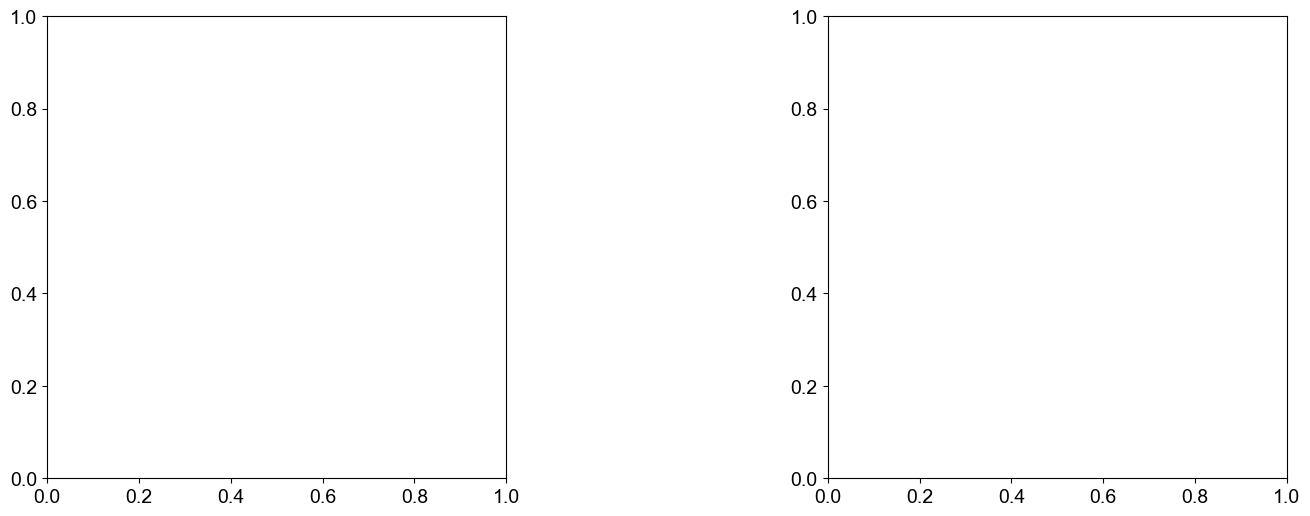

In [4]:
# run cluster based permutation tests for the conditions contrasts
# and plot sign. cluster
tfr.plot_tfr_cluster_test_output(cond='probability', tfr_a_cond=tfr_a_cond, tfr_b_cond=tfr_b_cond,
threed_test=False, cond_a_name='high', cond_b_name='low', channel_names=['CP4'])

previous response contrast

In [ ]:
# load the tfr data for each condition for prev_resp conds.
tfr_a_cond, tfr_b_cond = tfr.load_tfr_conds(study=[1], cond='prev_resp',
                                            cond_a_name='prevyesresp_highprob_stim_mirror',
                                            cond_b_name='prevnoresp_highprob_stim_mirror',
                                            cond_a_names=None, cond_b_names=None)

In [ ]:
# run cluster based permutation tests for the conditions contrasts
# and plot sign. cluster
tfr.plot_tfr_cluster_test_output(cond='prev_resp', tfr_a_cond=tfr_a_cond, tfr_b_cond=tfr_b_cond,
threed_test=False, cond_a_name='prevyesresp', cond_b_name='prevnoresp', channel_name=['CP4'])

In [ ]:
from expecon_ms.eeg.sensor import tfr_trial

In [ ]:
# add alpha and beta power per trial to behavioral data and save in csv file for further analysis in R
tfr_trial.save_band_power_per_trial(study=1, time_intervals={'pre': [(-0.2,0), (-0.3, -0.1)]}, channel_name=['CP4'])

4. Source reconstruction

In [3]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.source import source_reco

Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\source\source_reco.py : Mon Dec 18 14:46:56 2023 +1000


In [ ]:
# run source reconstruction for each condition
source_reco.run_source_reco(study=1, cond="probability", dics=True, fmin=15, fmax=25,
tmin=-0.4, tmax=0, save_path=beamformer_path, drop_bads=True, plot_alignment=False)

# create source contrast array for each condition
source_reco.create_source_contrast_array(study=1, cond_a='high', cond_b='low', 
                                         cond='probability', path_to_source=beamformer_path)

# plot source contrast (grand average over all participants)
source_reco.plot_grand_average_source_contrast(study=1, cond='probability', method='dics')

### Intermediate summary
Analysis of eeg data showed that in somatosensory regions, prestimulus beta power codes stimulus expectations in the volatile environment. For the stable environment prestimulus beta power codes the previous response. Source reconstruction shows the beta power source for stimulus probability in S2 and for previous responses in posterior cortex and ACC.